# Data Wrangling II operations using Python. (e.g.,Academic_Performance.csv) 

                                                                                 -By Aditya Nikam(TE AI & DS)

1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole
dataset.

2.Scan all numeric variables for outliers. If there are outliers,any of the
suitable techniques to deal with them.(using z score)

3.Display and Remove the outliers

4.Apply data transformations on at least one of the variables Create bins
and Labels.

5.Draw box plot

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\AcademicPerformance_New.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [3]:
df.info()#It gives the summary of the dataframe and it tells how many non null values are there in each column ,what 
#is the data type of each coloumn,how many columns are there in the dataset
#Here we cans ee that in our dataset there are 8 coloumns where 3 coloumns have object Datatype
#5 coloumns have float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [4]:
df.head()#its display the starting records of the dataset.Its default value is 5

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [5]:
#Now we want to rename the column named "NationalITy" to "Nationality"
df=df.rename(columns={"NationalITy":"Nationality"})
df

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [6]:
df.isnull().sum()#This displays the number of null values in each column

Roll No         1
Nationality     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [7]:
#Lets start by filling the Roll Number column we can see in dataset after roll no 2 the next value is null which
#is the only null value here in this dataset for Roll Number so we write the below comman
df["Roll No"]=df.index+1#Here I have filled the null value of Roll Number column
#df.index starts the indexing in your dataset from 0 but you want numbering to start from 1 so we
#have done plus one and we have written "Roll No" because we want to changes in Roll No column only
df

#If you are thinking to fill Roll No column manually using fillna()method then thats wrong and will cause an error
#beacuse fillna()cannot be used to fill a single value only

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [8]:
df["Nationality"].mode()#Here we are finding the mode of the Nationality column means which Nationallity has most occurences
#in our dataset

0    USA
Name: Nationality, dtype: object

In [9]:
df["Nationality"]=df["Nationality"].replace(np.nan,df["Nationality"].mode()[0])
df#Here we are replacing the missing value of Nationallity column with the mode value of Nationality column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,USA,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [10]:
df["PG"].mode()#Here we are finding the mode of the PG column means which PG has most occurences
#in our dataset

0     No
1    Yes
Name: PG, dtype: object

In [11]:
df["PG"]=df["PG"].replace(np.nan,df["PG"].mode()[0])
df#Here we are replacing the missing value of PG column with the mode value of PG column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,USA,NaN,NaN,NaN,NaN,NaN,No
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [12]:
df.isnull().sum()#This displays the number of null values in each column

Roll No         0
Nationality     0
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              0
dtype: int64

In [13]:
df["WT"].mean()#here we are calculating the average(mean)of the WT column

61.16483516483517

In [14]:
df["WT"]=df["WT"].replace(np.nan,df["WT"].mean())
df#We are replacing the missing values of WT column with the mean value of WT column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,NaN,53.000000,B,No
2,3,USA,61.164835,NaN,NaN,NaN,NaN,No
3,4,China,47.000000,NaN,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,NaN,NaN,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [15]:
df["DSBDA"].median()#here we are calculating the median value of the DSBDA column

66.0

In [16]:
df["DSBDA"]=df["DSBDA"].replace(np.nan,df["DSBDA"].median())
df#We are replacing the missing values of DSBDA column with the mean value of DSBDA column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,NaN,53.000000,B,No
2,3,USA,61.164835,66.0,NaN,NaN,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,NaN,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [17]:
df["AI"].median()#here we are calculating the median value of the AI column

63.0

In [18]:
df["AI"]=df["AI"].replace(np.nan,df["AI"].median())
df#We are replacing the missing values of AI column with the median value of AI column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,NaN,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [19]:
df["Average"].mean()#here we are calculating the average(mean)of the Average column

58.66326530611529

In [20]:
df["Average"]=df["Average"].replace(np.nan,df["Average"].mean())
df#We are replacing the missing values of Average column with the mean value of Average column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,58.663265,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [21]:
df["Grade"].mode()#here we are calculating the mode of Grade column

0    D
Name: Grade, dtype: object

In [22]:
df["Grade"]=df["Grade"].replace(np.nan,df["Grade"].mode()[0])
df#Here we are finding the mode of the Grade column means which Grade has most occurences
#in our dataset

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,58.663265,D,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [23]:
df.isnull().sum()#We have fill null values in every column now there are no null values in our dataset

Roll No        0
Nationality    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

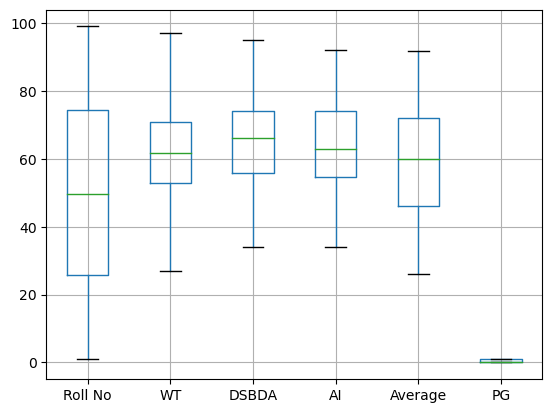

In [29]:
import matplotlib.pyplot as plt
df.boxplot()#this line plot box plots for all numeric columns of the dataset it and it also shows outliers and it 
#uses IQR technique to show outliers.It calculates Q1 and Q3 for respective columns and then calculates IQR and then upper
#lower bound
plt.show()
#Here we can see four outliers in our dataset.Outliers are denoted by circles here.One outlier is there in WT column
#one outlier is there in DSBDA column and two outliers are there in AI column so in total 4 outliers

# Outlier Detection & Removal using Z-Score

In [25]:
def detect_outliers(column_values, threshold=2.6,):#we have created a function to detect outliers using z score
    #Here I have taken two arguments in function which are column_values and threshold.Here I have put threshold value as 
    #2.6 to detect outliers means any z_score which is greater than threshold will be an outlier
    #Now you will wonder how 2.6 came here so we can keep any value as threshold like 1,2,3,4 etc but generally(99%) in 
    #z score technique we so not keep threshold above 3.I have used 2.6 because outliers number was not matching to my 
    #output means in above df.boxplot() command there are four outliers if i changed the threshold to 3 then only one
    #outlier was detected if i put threshold as 1 then many outliers were detected if i put threshold as 2 or 2.5 then only
    #3 outliers were detected and when i put 2.6 then the outliers were 4 which are correct as we have seen there are four 
    #outliers from df.boxplot() command
    outliers = []#I have created a list to store the outliers
    mean=np.mean(column_values)#it is used to calculate the mean of that particular column means for col in numeric_cols run
    #then first value of numeric_col list is WT so WT will enter the for loop and to detect the outlier we are calling 
    #detect_outlier function and here we will calculate the z score for each value of WT column using the for loop and
    #detect the outliers
    std=np.std(column_values)#it is used to calculate the standard devaition of that particular column

    for value in column_values:#we are going through each value of that particular column
        z_score =(value - mean)/ std#it calculates the z score for each value in that column
        if np.abs(z_score) > threshold:#if z_score is greater than threshold then its an outlier
            #we are np.abs(z_score) means absolute value of z_score means negative value will also be converted to positive
            outliers.append(value)#we are appending detected outliers in outliers list
    return outliers#to return the outlier list
numeric_cols = ["WT", "DSBDA", "AI", "Average"]

# Step 5: Apply the function and print outliers for each column
for col in numeric_cols:#goes through each value of numeric_cols list one by one
    col_outliers = detect_outliers(df[col])#calling the detect_outlier function to detect the outliers
    print(f"\nOutliers in column '{col}':")
    print(col_outliers if col_outliers else "No outliers found.")#we are printing the outliers if they are found else
    #we are printing no outliers found



Outliers in column 'WT':
[18.0]

Outliers in column 'DSBDA':
[26.0]

Outliers in column 'AI':
[20.0, 22.0]

Outliers in column 'Average':
No outliers found.


In [26]:
# Step 5: Apply the function and print outliers for each column
df = df[(np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()) <= 2.6).all(axis=1)]#This command
#computes the Z_score for each value of numeric_cols defined in numeric_cols list above and we want to remove the rows 
#which have outliers so we have done this by keeping only those rows who have threshold value less than or equal to 2.6
#which is our threshold value
df#Now instead of 99 rows we will have only 96 rows as three rows had outliers means(values above threshold value)

#Now you may be wondering that we had 4 outliers so 4 rows should have been removed but only 3 rows are removed
#The reason for that is we have one row where two outliers are present means one row there are two outliers so only three
#rows are removed in total

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,58.663265,D,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


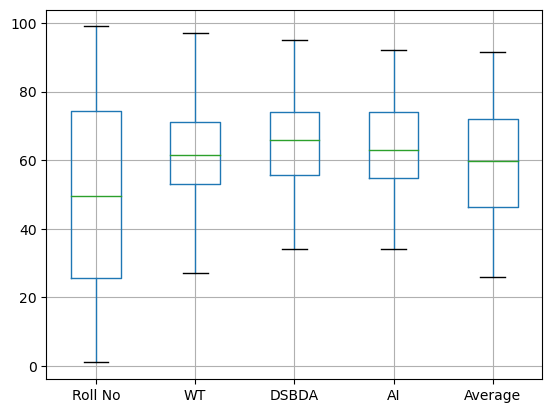

In [27]:
df.boxplot()
plt.show()#Now we have plotted the box plot after removing the outliers to show that there are no outliers in the data now

# Data Transformation using Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder#this imports Label Encoder tool from sci-kit library
#Label Encoder helps to convert the text values into numeric values
le = LabelEncoder()#it creates an object of Label Encoder
df['PG']=le.fit_transform(df['PG'])#now .fit(): Looks at all the unique values in the column PG (like "Yes" and "No")
#.transform(): Converts those values into numbers (like "Yes" → 1, "No" → 0)  
df#So now the text values(Yes and No) in PG column are converted into numeric values 1 and 0 respectively

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,1
1,2,Japan,69.000000,90.0,63.0,53.000000,B,0
2,3,USA,61.164835,66.0,63.0,58.663265,D,0
3,4,China,47.000000,66.0,44.0,30.333333,D,1
4,5,India,76.000000,78.0,63.0,51.333333,C,0
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,0
95,96,Japan,78.000000,81.0,82.0,80.333333,A,0
96,97,USA,65.000000,66.0,62.0,64.333333,B,0
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,1


In [33]:
bins = [0, 50, 70, 100]#This line creates ranges (called bins) for dividing the "Average" marks.
#Bins help to categorize the values of the column in various categories
#Like here we have a range 0 to 50 then 50 to 70 and then 70 to 100 means three categories are there

#Now suppose value is exactly 50 then you will wonder that will the value go in the category between 0 to 50 or in the 
#category between 50 to 70 the answer is from the range 0 to 50 because the first category range starts from zero and goes 
#till less than 50 or equal to 50(<=50)then second range starts from 51 to 70 and then from 71 10 100

# Define labels for each bin
labels = ['Below Average', 'Medium', 'Above Average']#We are giving the name for each bin.Its like we are giving a name to 
#category 1,category 2 and category 3 so we are giving the name to category 1 as Below Average,category 2 as Medium
#category 3 as Above Average

# Create a new column called 'Performance'
df['Performance'] = pd.cut(df['Average'], bins=bins, labels=labels)#This line:Looks at the values in the "Average" column,
#Puts each value into the correct bin based on its score,
#Then adds a new column called "Performance" showing whether the score is "Below Average", "Medium", or "Above Average".
#pd.cut is afunction that divides the numerical values into categories according to the bins

# Show the updated DataFrame
df[['Average', 'Performance']].head()#Now we are showing only starting 5 records of Average and Performance column from 
#our dataset


,Average,Performance
0,72.666667,Above Average
1,53.000000,Medium
2,58.663265,Medium
3,30.333333,Below Average
4,51.333333,Medium


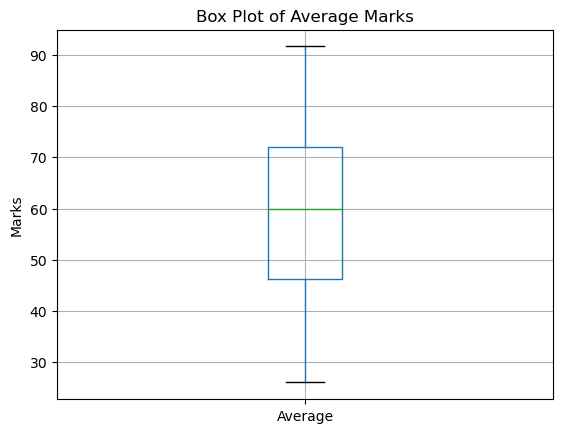

In [34]:
import matplotlib.pyplot as plt
df.boxplot(column='Average')#We are plotting box plot for average column
plt.title('Box Plot of Average Marks')#This is the title of the plot
plt.ylabel('Marks')#on y axis we are writing Average Marks
plt.show()#this is used to display the box plot
